## First Try of Predicting base price

### Third question:
<blockquote>Do the reviews make an impact on the base price?</blockquote>

For the last question regarding what is related to relationships of variables with price and review - Each of these questions will involve not only building some predictive model but also finding and interpreting the influential components of whatever model we build.

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
# let's take a look of Airbnb boston dataset (reviews)
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9569407,Clean & Cozy Newton/Boston College,44920239,Marcia,NaN,Brighton,42.33588,-71.18811,Private room,60,91,13,2019-09-02,0.17,2,255,0,NaN
1,31650137,Cozy Queen Bedroom close to Boston,13005723,Anderson,NaN,Charlestown,42.40645,-71.05180,Private room,104,2,144,2022-06-02,3.60,3,85,57,NaN
2,6599485,Cambridge Harvard Comfortable Room,6438360,John,NaN,Allston,42.38461,-71.13500,Private room,63,30,210,2022-03-19,2.50,2,154,3,NaN
3,26703374,Harvard Square less than 2 miles,71156317,Eddy,NaN,Brighton,42.37511,-71.15229,Private room,87,3,21,2022-06-09,0.45,1,61,16,STR-16228
4,13883630,"Nice, Clean, Warm, Smoke Free 1 in East Somerv...",80080682,Maria And Jose,NaN,Charlestown,42.38751,-71.09151,Private room,90,2,128,2022-05-26,1.78,2,226,12,NaN


The correlation matrix helped me to understand which variables are related to one another. The relationship between two values can better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most. Like the relation between number_of_reviewers_ltm and reviews_per_month or number_of_reviewers and number_of_reviewers_ltm. These are my columns of interest.

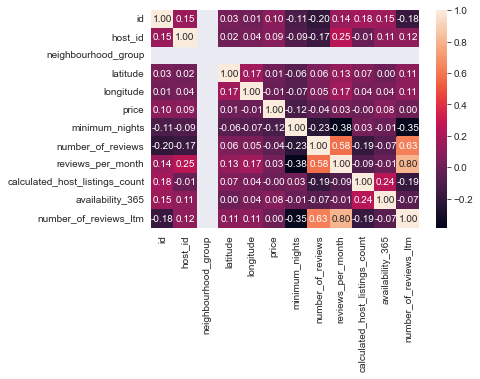

In [22]:
sns.heatmap(df_listings.corr(), annot=True, fmt=".2f");

The quantitative variables to an X matrix, which they are used to predict the response. It's a supervised learning.

In [31]:
df_calendar_per_listing_complete = df_listings[['reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm',  'price']]

df_calendar_per_listing_complete.replace(to_replace = np.nan, value = 0)
df_calendar_per_listing_clean =df_calendar_per_listing_complete.dropna()


X = df_calendar_per_listing_clean[['reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm']]

y = df_calendar_per_listing_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)


'The r-squared score for your model was 0.015214610732808831 on 1124 values.'

A fund with a low R-squared, at 70% or less, indicates the security does not generally follow the movements of the index.